# Mentioned facts in the paper

In [2]:
%load_ext autoreload
%autoreload 2

In [27]:
import numpy as np
import matplotlib.pylab as plt
import time
from copy import deepcopy
import pickle
import torch

import importlib
import matplotlib as mpl
import matplotlib.patches as mp
import pandas as pd

from pyloric import create_prior, simulate, summary_stats
from stg_energy.common import col, svg, get_labels_8pt
import stg_energy.fig1_posterior.viz as viz
from sbi.utils import pairplot
from stg_energy import check_if_close_to_obs 

In [28]:
pd.options.display.max_columns=999

### Probability of accepted samples under the posterior

In [29]:
path = "../results/simulation_data_Tube_MLslurm_cluster"
theta = pd.read_pickle(path + '/simulate_11deg_R3_predictives_at_11deg/data/all_circuit_parameters.pkl')
x = pd.read_pickle(path + '/simulate_11deg_R3_predictives_at_11deg/data/all_simulation_outputs.pkl')
seeds = np.load(path + '/simulate_11deg_R3_predictives_at_11deg/data/all_seeds.npy')
theta_np = theta.to_numpy()
x_np = x.to_numpy()

print("Number of great samples", x_np.shape[0])

Number of great samples 1020000


In [30]:
close_sim = check_if_close_to_obs(x_np)

In [31]:
close_theta = theta_np[close_sim]
not_close_theta = theta_np[np.invert(close_sim)]

In [35]:
with open("../results/trained_neural_nets/inference/posterior_11deg.pickle", "rb") as handle:
    posterior = pickle.load(handle)
    posterior._device = "cpu"
    
xo = np.load("../results/experimental_data/xo_11deg.npy")

In [36]:
num_eval = 10_000
close_log_prob = posterior.log_prob(torch.as_tensor(close_theta[:num_eval], dtype=torch.float32), x=xo)
not_close_log_prob = posterior.log_prob(torch.as_tensor(not_close_theta[:num_eval], dtype=torch.float32), x=xo)

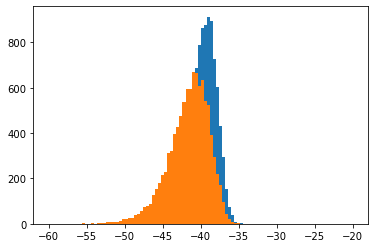

In [46]:
vals_good, _, _ = plt.hist(close_log_prob.detach().numpy(), bins=100, range=[-60, -20])
vals_bad, _, _ = plt.hist(not_close_log_prob.detach().numpy(), bins=100, range=[-60, -20])

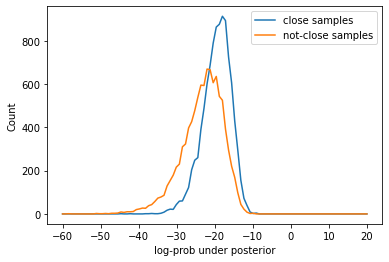

In [50]:
plt.plot(np.linspace(-60, 20, 100), vals_good)
plt.plot(np.linspace(-60, 20, 100), vals_bad)
plt.ylabel("Count")
plt.xlabel("log-prob under posterior")
plt.legend(["close samples", "not-close samples"])

### Fraction of samples that produce valid simulation outputs

In [6]:
theta = pd.read_pickle("../results/simulation_data_Tube_MLslurm_cluster/01_simulate_11deg/data/valid_circuit_parameters.pkl")
x = pd.read_pickle("../results/simulation_data_Tube_MLslurm_cluster/01_simulate_11deg/data/valid_simulation_outputs.pkl")
seeds = np.load("../results/simulation_data_Tube_MLslurm_cluster/01_simulate_11deg/data/valid_seeds.npy")

theta_np = theta.to_numpy()
x_np_1 = x.to_numpy()

print("Fraction of prior samples that produce well-defined summstats: ", x_np_1.shape[0] / 3000000 * 100, "%")

Fraction of prior samples that produce well-defined summstats:  0.9731 %


In [7]:
theta = pd.read_pickle("../results/simulation_data_Tube_MLslurm_cluster/01_simulate_11deg_R2/data/valid_circuit_parameters.pkl")
x = pd.read_pickle("../results/simulation_data_Tube_MLslurm_cluster/01_simulate_11deg_R2/data/valid_simulation_outputs.pkl")
seeds = np.load("../results/simulation_data_Tube_MLslurm_cluster/01_simulate_11deg_R2/data/valid_seeds.npy")

theta_np = theta.to_numpy()
x_np_2 = x.to_numpy()

print("Fraction of restricted prior (Round 2) samples that produce well-defined summstats: ", x_np_2.shape[0] / 3000000 * 100, "%")

Fraction of restricted prior (Round 2) samples that produce well-defined summstats:  5.167766666666666 %


In [8]:
theta = pd.read_pickle("../results/simulation_data_Tube_MLslurm_cluster/01_simulate_11deg_R3/data/valid_circuit_parameters.pkl")
x = pd.read_pickle("../results/simulation_data_Tube_MLslurm_cluster/01_simulate_11deg_R3/data/valid_simulation_outputs.pkl")
seeds = np.load("../results/simulation_data_Tube_MLslurm_cluster/01_simulate_11deg_R3/data/valid_seeds.npy")

theta_np = theta.to_numpy()
x_np_3 = x.to_numpy()

print("Fraction of restricted prior (Round 3) samples that produce well-defined summstats: ", x_np_3.shape[0] / 3000000 * 100, "%")

Fraction of restricted prior (Round 3) samples that produce well-defined summstats:  8.4794 %


In [9]:
print("Total number of valid simulations:  ", x_np_1.shape[0] + x_np_2.shape[0] + x_np_3.shape[0])

Total number of valid simulations:   438608


### Almost no prior simulations match our criteria

In [21]:
theta = pd.read_pickle("../results/simulation_data_Tube_MLslurm_cluster/01_simulate_11deg/data/valid_circuit_parameters.pkl")
x = pd.read_pickle("../results/simulation_data_Tube_MLslurm_cluster/01_simulate_11deg/data/valid_simulation_outputs.pkl")
seeds = np.load("../results/simulation_data_Tube_MLslurm_cluster/01_simulate_11deg/data/valid_seeds.npy")

theta_np = theta.to_numpy()
x_np = x.to_numpy()

In [18]:
close_sim = check_if_close_to_obs(x_np)

In [22]:
print("Number of prior simulations that fulfilled our criteria:  ", np.sum(close_sim))
print("Overall, we had simulated 3 million times (dataset `/01_simulate_11deg/data/all_circuit_parameters.pkl`)")

Number of prior simulations that fulfilled our criteria:   0
Overall, we had simulated 3 million times (dataset `/01_simulate_11deg/data/all_circuit_parameters.pkl`)


In [5]:
theta = pd.read_pickle("../results/simulation_data_Tube_MLslurm_cluster/01_simulate_11deg_R3/data/valid_circuit_parameters.pkl")
x = pd.read_pickle("../results/simulation_data_Tube_MLslurm_cluster/01_simulate_11deg_R3/data/valid_simulation_outputs.pkl")
seeds = np.load("../results/simulation_data_Tube_MLslurm_cluster/01_simulate_11deg_R3/data/valid_seeds.npy")

theta_np = theta.to_numpy()
x_np = x.to_numpy()

In [6]:
close_sim = check_if_close_to_obs(x_np)

In [7]:
print("Number of restricted prior simulations that fulfilled our criteria:  ", np.sum(close_sim))
print("Overall, we had simulated 3 million times (dataset `/01_simulate_11deg/data/all_circuit_parameters.pkl`)")

Number of prior simulations that fulfilled our criteria:   1
Overall, we had simulated 3 million times (dataset `/01_simulate_11deg/data/all_circuit_parameters.pkl`)


### Number of posterior samples that fulfill the criterion

In [30]:
path = "../results/simulation_data_Tube_MLslurm_cluster"
theta = pd.read_pickle(path + '/close_to_xo_circuit_parameters.pkl')
x = pd.read_pickle(path + '/close_to_xo_simulation_outputs.pkl')
seeds = np.load(path + '/close_to_xo_seeds.npy')
theta_np = theta.to_numpy()
x_np = x.to_numpy()

print("Number of great samples", x_np.shape[0])

Number of great samples 35939


### Number of posterior samples that match data at 11 and 27 degree

In [34]:
print("Number of great samples (see fig4 notebook):    ", 967)

Number of great samples (see fig4 notebook):     967


### Hyperparameters of the classifier

In [18]:
print("batchsize, lr, hiddenunits, num_transform_layers:     ", 199, 0.000758956039499681, 0.437553839592111, 80, 5)

batchsize, lr, hiddenunits, num_transform_layers:      199 0.000758956039499681 0.437553839592111 80 5


### Hyperparameters of the posterior

In [12]:
with open("../results/trained_neural_nets/inference/posterior_11deg_hyperparams_seed847297.pickle", "rb") as handle:
    hyperparams = pickle.load(handle)

In [13]:
print("batchsize, lr, hiddenunits, num_transform_layers:     ", hyperparams)

batchsize, lr, hiddenunits, num_transform_layers:      tensor([2.0000e+02, 1.0000e-04, 2.0000e+02, 1.0000e+01])
